In [1]:
# 구글 코랩용 뉴스 크롤링 + 워드클라우드 예제

# 워드클라우드 관련 라이브러리 설치 (코랩에서 한 번만 실행)
!pip install wordcloud konlpy

# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 34.7 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/

In [3]:
# 구글 코랩용 뉴스 크롤링 예제

# 필요한 라이브러리 임포트
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:


def crawl_naver_news():
    """네이버 뉴스 메인 페이지에서 헤드라인을 크롤링하는 함수"""

    print(" 네이버 뉴스 크롤링을 시작합니다...")

    # 웹 페이지 URL
    url = "https://news.naver.com"

    # 헤더 설정 (코랩 환경에 맞게 조정)
    headers = {
        'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        # 웹 페이지 요청
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        # HTML 파싱
        soup = BeautifulSoup(response.text, 'html.parser')

        # 뉴스 헤드라인 추출
        headlines = []

        # 여러 가지 방법으로 뉴스 헤드라인 찾기
        selectors = [
            'a.cjs_news_link',
            'a[href*="/article/"]',
            '.hdline_article_tit',
            '.cluster_text_headline'
        ]

        for selector in selectors:
            items = soup.select(selector)
            if items:
                for item in items[:10]:
                    title = item.get_text().strip()
                    if title and len(title) > 10:
                        headlines.append(title)
                break

        # 결과 출력
        print(f"\n 총 {len(headlines)}개의 뉴스 헤드라인을 찾았습니다!")
        print("=" * 60)

        for i, headline in enumerate(headlines[:10], 1):
            print(f"{i:2d}. {headline}")

        print("=" * 60)

        return headlines

    except requests.RequestException as e:
        print(f" 네트워크 오류: {e}")
        return []
    except Exception as e:
        print(f" 크롤링 오류: {e}")
        return []



 구글 코랩 웹 크롤링 실습을 시작합니다!

 네이버 뉴스 크롤링을 시작합니다...

 총 10개의 뉴스 헤드라인을 찾았습니다!
 1. 李 대통령 국정지지율 59.7%… 민주 50.6%·국힘 30.0%



대전일보
 2. 1차 추경에도 내수 부진…산업생산 두 달째↓·소비 반등 못해



SBS
 3. 李대통령 국정수행 긍정평가 59.7%…민주 50.6%·국힘 30%



국제신문
 4. 李대통령 국정지지율 59.7%…정당 지지, 민주 50.6%·국힘 30.0%



강원일보
 5. [단독] 3년간 1.5억 쓰고 현직 변호사 과외도… ‘현대판 음서제’ 로스쿨
 6. “아가씨 만져보고 싶어서”…4명 살해한 ‘악마 어부’ 최후 [사건파일]
 7. “여보, 당첨됐어!” 로또 2억 ‘대박’…곧바로 뒷목 잡은 사연, 무슨 일?
 8. 트럼프 “안 만나고 관세 통보…한국·일본 차 낮은 관세 없다”
 9. 봄을 만나는 '한량 스타일 산행' [남난희의 느린 산 우리 집 앞산 백운산]
10. 숨쉬는 근육 훈련하면, 노년 산행이 편하다 [한의사 박호연의 산행 처방]

 뉴스 데이터 분석:
총 뉴스 개수: 10
평균 글자수: 41.6
최대 글자수: 49
최소 글자수: 34

 데이터프레임 미리보기:
   순번                                               헤드라인  글자수  \
0   1   李 대통령 국정지지율 59.7%… 민주 50.6%·국힘 30.0%\n\n\n\n대전일보   44   
1   2       1차 추경에도 내수 부진…산업생산 두 달째↓·소비 반등 못해\n\n\n\nSBS   40   
2   3   李대통령 국정수행 긍정평가 59.7%…민주 50.6%·국힘 30%\n\n\n\n국제신문   44   
3   4  李대통령 국정지지율 59.7%…정당 지지, 민주 50.6%·국힘 30.0%\n\n\...   49   
4   5         [단독] 3년간 1.5억 쓰고 현직 변호사 과외도… ‘현대판 음서제’ 로스쿨   42 

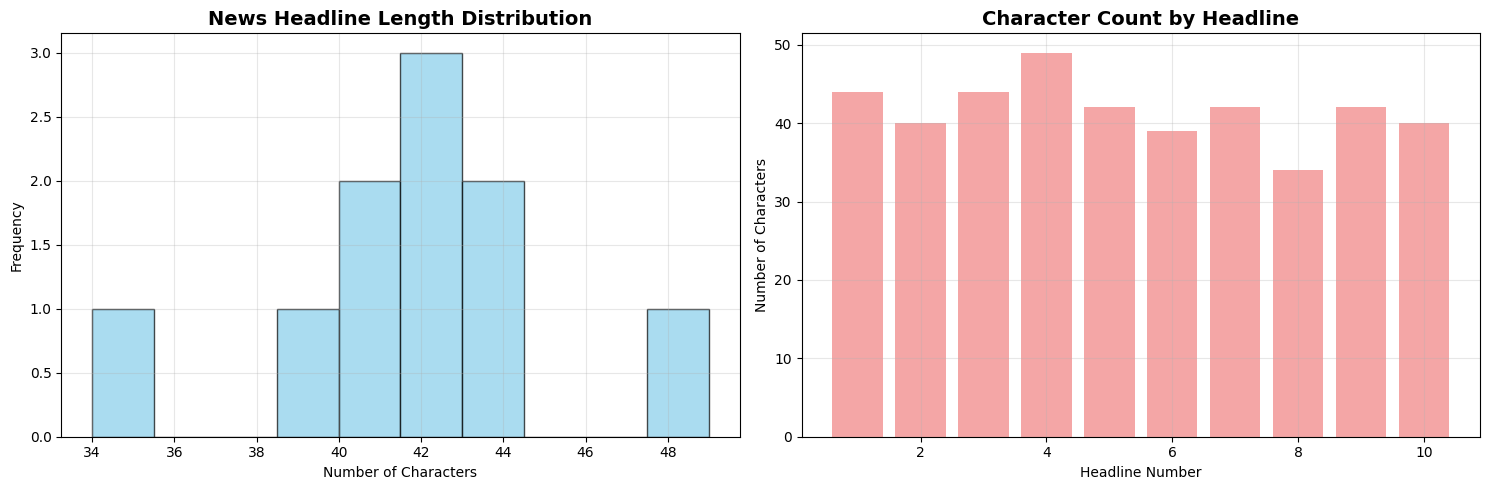


 'news_headlines.csv' 파일로 저장되었습니다!
   (코랩 왼쪽 파일 탭에서 다운로드 가능)

 크롤링 실습이 완료되었습니다!


In [5]:


def create_news_dataframe(headlines):
    """뉴스 헤드라인을 데이터프레임으로 변환"""

    if not headlines:
        print(" 분석할 헤드라인이 없습니다.")
        return None

    # 데이터프레임 생성
    df = pd.DataFrame({
        '순번': range(1, len(headlines) + 1),
        '헤드라인': headlines,
        '글자수': [len(headline) for headline in headlines],
        '크롤링시간': [datetime.now().strftime('%Y-%m-%d %H:%M:%S')] * len(headlines)
    })

    print("\n 뉴스 데이터 분석:")
    print(f"총 뉴스 개수: {len(df)}")
    print(f"평균 글자수: {df['글자수'].mean():.1f}")
    print(f"최대 글자수: {df['글자수'].max()}")
    print(f"최소 글자수: {df['글자수'].min()}")

    return df

def visualize_news_data(df):
    """뉴스 데이터 시각화"""

    if df is None or df.empty:
        print(" 시각화할 데이터가 없습니다.")
        return

    # 그래프 스타일 설정
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. 헤드라인 글자수 분포
    ax1.hist(df['글자수'], bins=10, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.set_title('News Headline Length Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Number of Characters')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)

    # 2. 헤드라인별 글자수
    ax2.bar(df['순번'], df['글자수'], color='lightcoral', alpha=0.7)
    ax2.set_title('Character Count by Headline', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Headline Number')
    ax2.set_ylabel('Number of Characters')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# 메인 실행 함수
def main():
    """메인 실행 함수"""

    print(" 구글 코랩 웹 크롤링 실습을 시작합니다!")
    print("=" * 70)

    # 1. 기초 개념 데모
    #demo_web_scraping_basics()

    print("\n" + "="*70)

    # 2. 실제 웹사이트 크롤링
    headlines = crawl_naver_news()

    # 3. 간단한 테스트 사이트 크롤링
    #crawl_simple_news_site()

    # 4. 데이터 분석
    if headlines:
        df = create_news_dataframe(headlines)

        if df is not None:
            print("\n 데이터프레임 미리보기:")
            print(df.head())

            # 5. 시각화
            visualize_news_data(df)

            # 6. CSV 파일로 저장 (코랩에서 다운로드 가능)
            df.to_csv('news_headlines.csv', index=False, encoding='utf-8')
            print("\n 'news_headlines.csv' 파일로 저장되었습니다!")
            print("   (코랩 왼쪽 파일 탭에서 다운로드 가능)")

    print("\n 크롤링 실습이 완료되었습니다!")



# 코랩에서 바로 실행
if __name__ == "__main__":
    main()



In [6]:
headlines = crawl_naver_news()

 네이버 뉴스 크롤링을 시작합니다...

 총 10개의 뉴스 헤드라인을 찾았습니다!
 1. 李 대통령 국정지지율 59.7%… 민주 50.6%·국힘 30.0%



대전일보
 2. 1차 추경에도 내수 부진…산업생산 두 달째↓·소비 반등 못해



SBS
 3. 李대통령 국정수행 긍정평가 59.7%…민주 50.6%·국힘 30%



국제신문
 4. 李대통령 국정지지율 59.7%…정당 지지, 민주 50.6%·국힘 30.0%



강원일보
 5. 빚 갚기 힘든 취약계층·자영업자 원금 감면 더 늘린다
 6. 직장인 1,000명이 꼽은 과제 2위 '청년 일자리'.. 1위는?
 7. 살벌한 고물가에 라면도 '가성비'.. 1봉지 400~500원 대 초저가 인기
 8. “여행주간이라며, 왜 아무도 말 안 해줬지?”.. 지금 가면 제주가 ‘30% 힐링 할인’ 중
 9. '검찰+김앤장' 출신을 민정수석에... 이 대통령은 왜?
10. 트럼프는 원칙대로 지지자들의 사업장도 털어댈까 [이게 이슈]
